In [14]:
# %matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime 
import seaborn as sns
from matplotlib import pyplot as plt

from utils.jtwc_cyclone_utils import get_southern_hem_data, get_NWP_data
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from utils.jtwc_cyclone_utils import get_saffir_simpson_category

In [15]:
future_cyclones_df = pd.read_csv('../cyclone_data/resampled/future_cyclone_intensity.csv', index_col=[0,1])
future_cyclones_df['category'] = future_cyclones_df['peak_wind'].apply(get_saffir_simpson_category)
future_cyclones_df

timestamp   lat    lon basin  tropical_sst  \
Scenario cyclone                                                         
126      0        2015-01-11 00:00:00 -11.2  100.2    SI     27.529080   
         1        2015-01-16 00:00:00 -11.0  110.4    SI     27.529080   
         2        2015-01-18 00:00:00 -12.1  143.3    SP     27.529080   
         3        2015-01-28 00:00:00 -13.5  119.8    SI     27.529080   
         4        2015-02-04 00:00:00  -9.9   96.8    SI     27.640710   
...                               ...   ...    ...   ...           ...   
585      1491     2049-10-27 00:00:00   5.2  153.1    WP     28.425661   
         1492     2049-11-06 00:00:00  -8.6  135.4    SI     28.619442   
         1493     2049-11-28 00:00:00  13.4  130.0    WP     28.619442   
         1494     2049-12-01 00:00:00  -9.7  117.5    SI     28.649030   
         1495     2049-12-15 00:00:00  14.0  144.3    WP     28.649030   

                  local_sst  relative_sst  local_sst_scaled  \
Scenario cyclone                                              
126      0        28.994474      1.465395          0.099300   
         1        29.503775      1.974695          0.852259   
         2        30.122950      2.593870          1.767656   
         3        30.021164      2.492084          1.617174   
         4        29.472370      1.831659          0.805829   
...                     ...           ...               ...   
585      1491     30.864584      2.438923          2.864100   
         1492     29.549793      0.930351          0.920292   
         1493     29.922213      1.302771          1.470884   
         1494     31.459743      2.810713          3.743992   
         1495     28.981530      0.332499          0.080163   

                  tropical_sst_scaled  basin_numerical   peak_wind  quantile  \
Scenario cyclone                                                               
126      0                   1.175159                0   79.320673      0.45   
         1                   1.175159                0   84.536871      0.65   
         2                   1.175159                1   66.258354      0.35   
         3                   1.175159                0  116.494162      0.95   
         4                   1.441322                0   54.019821      0.25   
...                               ...              ...         ...       ...   
585      1491                3.312910                2   50.198913      0.15   
         1492                3.774949                0   92.045377      0.65   
         1493                3.774949                2   55.387001      0.25   
         1494                3.845496                0   66.917288      0.55   
         1495                3.845496                2  129.256446      0.75   

                  category  
Scenario cyclone            
126      0               1  
         1               2  
         2               1  
         3               4  
         4               1  
...                    ...  
585      1491            1  
         1492            2  
         1493            1  
         1494            1  
         1495            4  

[5991 rows x 13 columns]

latitude: -20.6 to 30.3
longitude: 35.8 to 228.6


/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


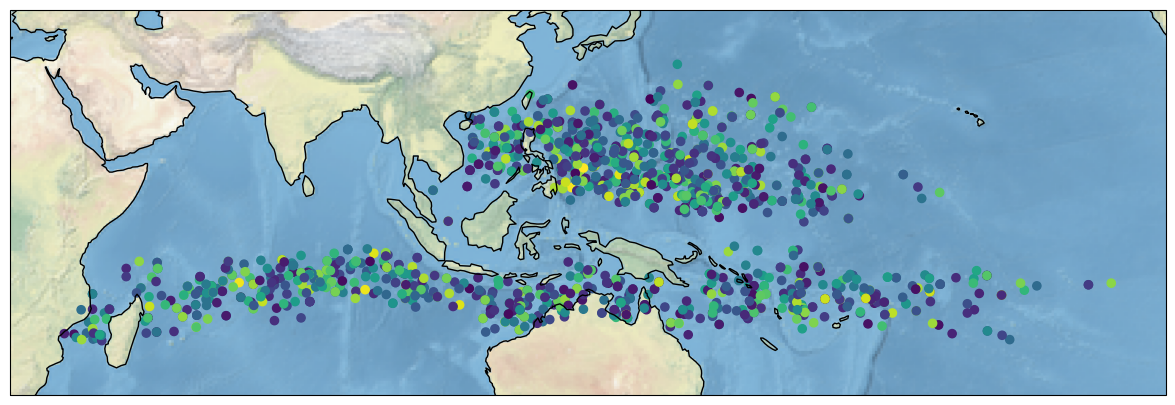

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [30]:

# %matplotlib inline
from matplotlib import pyplot as plt
import cartopy.crs as ccrs


new_cyclones = future_cyclones_df.loc[245]

## only show origin sites for now
min_long = new_cyclones['lon'].min()
min_lat = new_cyclones['lat'].min()

max_long = new_cyclones['lon'].max()
max_lat = new_cyclones['lat'].max()

centre_long = (max_long-min_long)/2

print('latitude: ' + str(min_lat) + ' to ' + str(max_lat))
print('longitude: ' + str(min_long) + ' to ' + str(max_long))

height = 5
fig = plt.figure(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= centre_long))
ax.set_extent([min_long - 10, max_long + 10 ,min_lat - 10,max_lat + 10], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

scatter = plt.scatter(x=new_cyclones['lon'], y=new_cyclones['lat'], c=new_cyclones['peak_wind'], transform=ccrs.PlateCarree(), s=35)

plt.show()
fig.tight_layout()
fig.savefig('./media/Cyclone/predictions/future_tc_wind_{scenario}.png')


# fig.savefig('./media/Cyclone/cyclone_map/all_cyclones.png')

<Axes: xlabel='Scenario', ylabel='Count'>

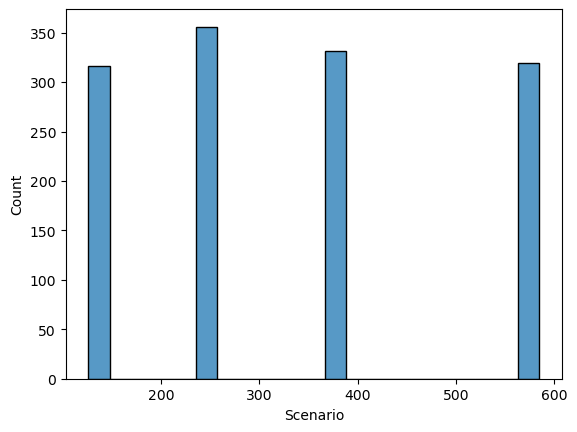

In [27]:

# %matplotlib inline
from matplotlib import pyplot as plt
import cartopy.crs as ccrs


scenarios = [125, 245, 370, 585]
scenarios_severe = future_cyclones_df.query('category > 3').reset_index(level=0)
sns.histplot(data=scenarios_severe,x ='Scenario')
## only show origin sites for now
    


In [17]:
### SUMMARY STATISTICS

basin_names = ['SI','SP','WP']
scenarios = [125, 245, 370, 585]
for scenario in scenarios:
    print(f'scenario: {scenario}')
    scenario_df = future_cyclones_df.loc[scenario]
    for basin_name in basin_names:
        print(f'basin: {basin_name}')
        basin_df = scenario_df.query(f"basin == '{basin_name}'")
        # basin_df = future_cyclones_df.loc[future_cyclones_df.loc[:, 'BASIN'] == basin_name]

        for category in range(1,6):
            category_df = basin_df.query(f"category == {category}")
            print(f'number of category {category} cyclones: {category_df.shape[0]/basin_df.shape[0]}')

        print(f'total: {basin_df.shape[0]}')

scenario: 126
basin: SI
number of category 1 cyclones: 0.5509355509355509
number of category 2 cyclones: 0.11434511434511435
number of category 3 cyclones: 0.11434511434511435
number of category 4 cyclones: 0.14345114345114346
number of category 5 cyclones: 0.07692307692307693
total: 481
basin: SP
number of category 1 cyclones: 0.5936254980079682
number of category 2 cyclones: 0.08366533864541832
number of category 3 cyclones: 0.11155378486055777
number of category 4 cyclones: 0.14342629482071714
number of category 5 cyclones: 0.06772908366533864
total: 251
basin: WP
number of category 1 cyclones: 0.5734720416124838
number of category 2 cyclones: 0.10533159947984395
number of category 3 cyclones: 0.11703511053315994
number of category 4 cyclones: 0.14044213263979194
number of category 5 cyclones: 0.06371911573472042
total: 769
scenario: 245
basin: SI
number of category 1 cyclones: 0.5397489539748954
number of category 2 cyclones: 0.100418410041841
number of category 3 cyclones: 0.11297

In [18]:
future_cyclones_df['int_time'] = future_cyclones_df['timestamp'].astype('datetime64[ns]').astype('int64')
median_time = future_cyclones_df['int_time'].quantile(0.5)
median_dt = pd.Timestamp(median_time.astype('datetime64[ns]'))
print(median_dt)

for scenario in scenarios:
    print(f'scenario: {scenario}')
    scenario_df = future_cyclones_df.loc[scenario]
    
    for basin_name in basin_names:
        print(f'basin: {basin_name}')
        basin_df = scenario_df.query(f"basin == '{basin_name}'")
        # basin_df = future_cyclones_df.loc[future_cyclones_df.loc[:, 'BASIN'] == basin_name]
        before_basin = basin_df.query(f'int_time < {median_time}')
        after_basin = basin_df.query(f'int_time > {median_time}')


        for category in range(1,6):

            category_df = basin_df.query(f"category == {category}")
            before_category = category_df.query(f'int_time < {median_time}')
            after_category = category_df.query(f'int_time > {median_time}')


            print(f'difference in of category {category} cyclones: {after_category.shape[0]/after_basin.shape[0] - before_category.shape[0]/before_basin.shape[0]}')           

        print(f'total: {basin_df.shape[0]}')




2031-10-21 00:00:00
scenario: 126
basin: SI
difference in of category 1 cyclones: 0.0008720828827571969
difference in of category 2 cyclones: -0.03416820734642621
difference in of category 3 cyclones: -0.017389332682178127
difference in of category 4 cyclones: -0.00610458017930024
difference in of category 5 cyclones: 0.05679003732514738
total: 481
basin: SP
difference in of category 1 cyclones: 0.1047965301696645
difference in of category 2 cyclones: -0.028638856997065948
difference in of category 3 cyclones: -0.04885827273886975
difference in of category 4 cyclones: -0.028511289705319576
difference in of category 5 cyclones: 0.0012118892715907714
total: 251
basin: WP
difference in of category 1 cyclones: -0.01032187966861331
difference in of category 2 cyclones: -0.010552763819095479
difference in of category 3 cyclones: 0.013771560505228847
difference in of category 4 cyclones: -0.010593508080945252
difference in of category 5 cyclones: 0.017696591063425235
total: 769
scenario: 245
